In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("Customer Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", 0)
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum().sum()

np.int64(0)

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [13]:
df["customerID"].duplicated().sum()

np.int64(0)

#Converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [20]:
def conv(value):
    if value == 1:
        return "Yes"
    else:
        return "No"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [21]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


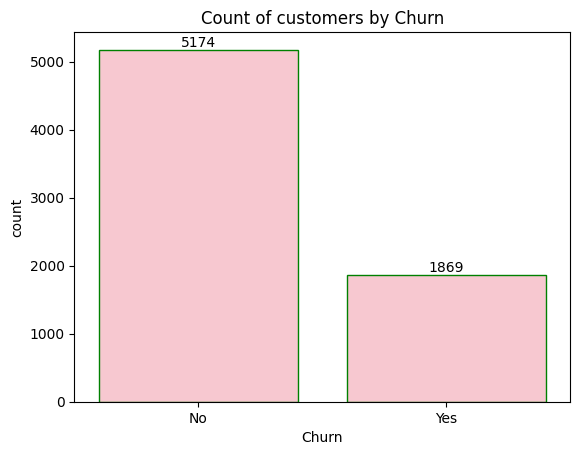

In [42]:
br = sns.countplot(x = 'Churn', data = df, color = 'pink', edgecolor = 'g')
br.bar_label(br.containers[0])
plt.title("Count of customers by Churn")
plt.show()

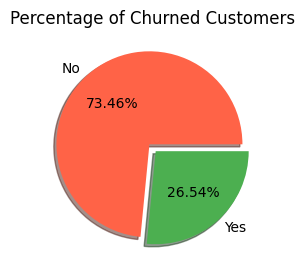

In [62]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn' : 'count'})
gb
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%", colors = ["tomato", "#4CAF50"], shadow = True, explode = [0.05,0.05])
plt.title("Percentage of Churned Customers")
plt.show()

#From the given pie chart we conclude that 26.54% of our customers have churned out. 
#Now explore the reason behind it...

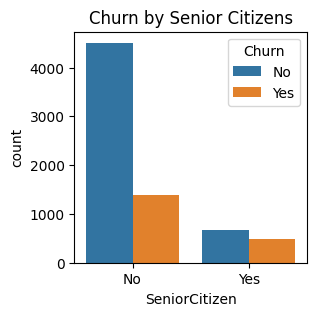

In [72]:
plt.figure(figsize = (3,3))
br1 = sns.countplot(x = "SeniorCitizen", hue = "Churn", data = df)
plt.title("Churn by Senior Citizens")
plt.show()

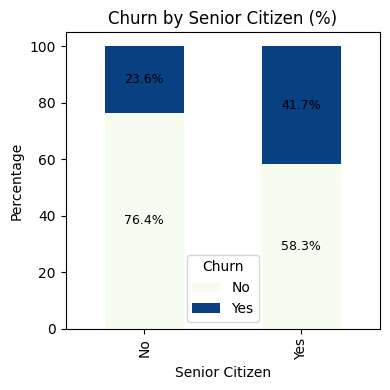

In [80]:
# Step 1: Create crosstab for Churn by SeniorCitizen
crosstab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert counts to percentages
crosstab_percent = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
ax = crosstab_percent.plot(kind='bar', stacked=True, figsize=(4, 4), colormap='GnBu')

# Step 4: Add percentage labels
for i, (index, row) in enumerate(crosstab_percent.iterrows()):
    cum_height = 0
    for j, val in enumerate(row):
        if val > 0:
            ax.text(i, cum_height + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
            cum_height += val

# Step 5: Final touches
plt.title("Churn by Senior Citizen (%)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title='Churn', loc='best')
plt.tight_layout()
plt.show()


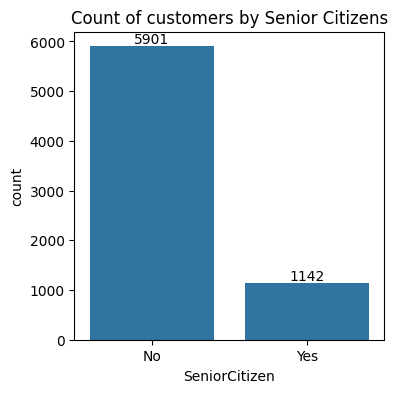

In [83]:
plt.figure(figsize = (4,4))
br2 = sns.countplot(x = "SeniorCitizen",  data = df)
br2.bar_label(br2.containers[0])
plt.title("Count of customers by Senior Citizens")
plt.show()

#Comparative a greater percentage of people in senior citizen category have churned

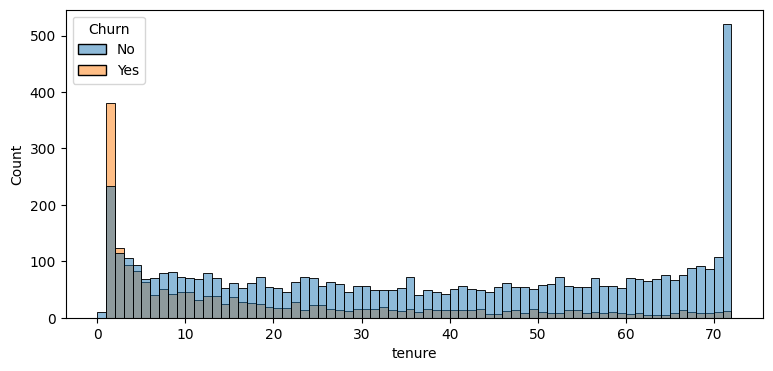

In [91]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, hue = "Churn", bins = 72)
plt.show()

#People who used our services for a long time have stayed and people who have used our services for one or two months have churned. 

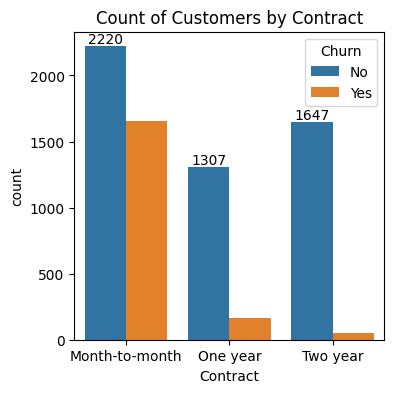

In [95]:
plt.figure(figsize = (4,4))
br4 = sns.countplot(x = "Contract",  data = df, hue = "Churn")
br4.bar_label(br4.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract.

In [99]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

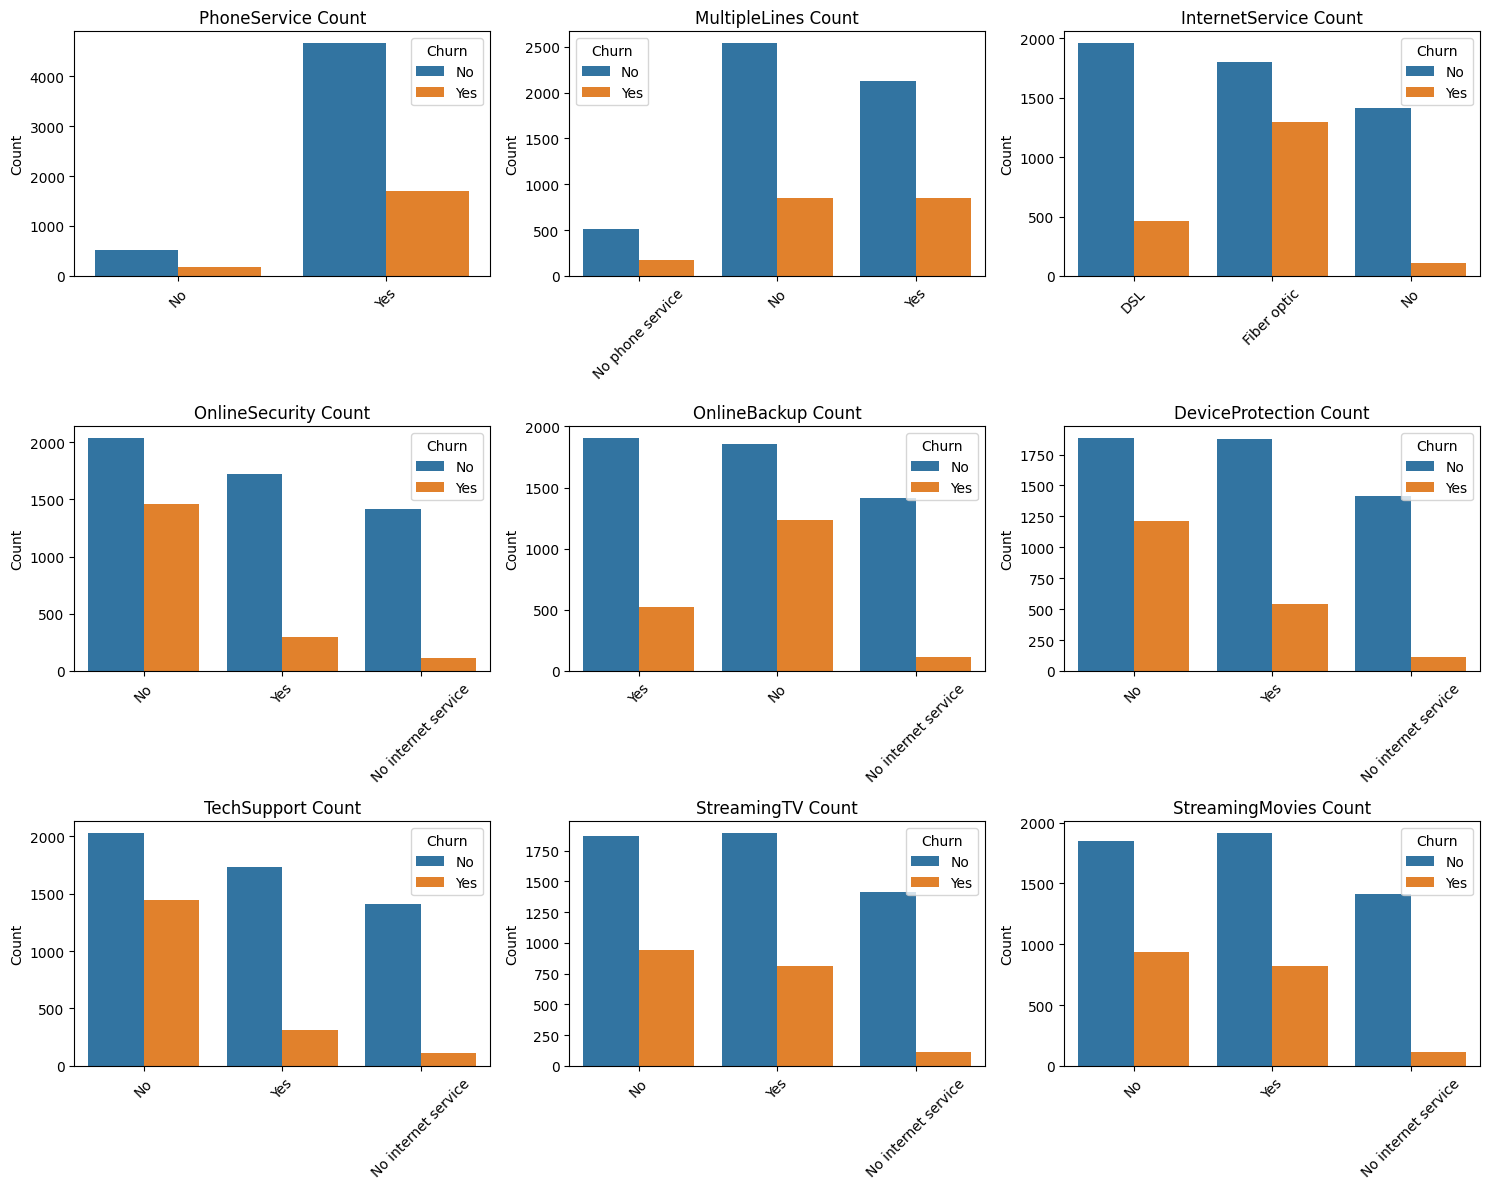

In [102]:
# List of columns
cols = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plot each column
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, ax=axes[i], hue = "Churn")
    axes[i].set_title(f'{col} Count')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused axes (just in case)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#This set of bar charts visualizes the relationship between customer churn (Yes/No) and various telecom services. Across most services (e.g., InternetService, OnlineSecurity, TechSupport), customers without certain services or those with limited service features tend to churn more frequently. Notably, customers with fiber optic internet and no additional protections (like OnlineSecurity or DeviceProtection) show higher churn rates. Providing more value-added services might help reduce churn.

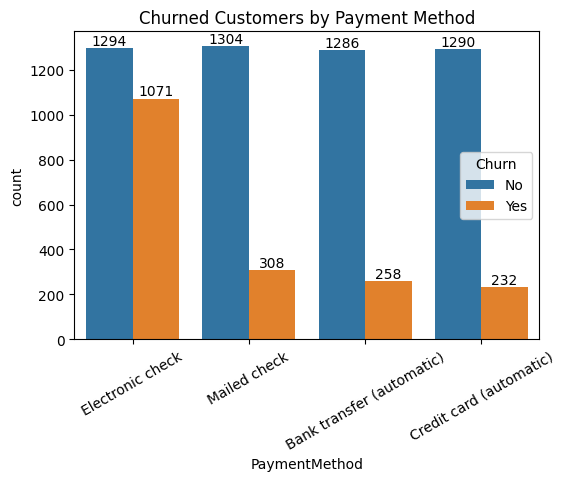

In [108]:
plt.figure(figsize = (6,4))
br5 = sns.countplot(x = "PaymentMethod",  data = df, hue = "Churn")
br5.bar_label(br5.containers[0])
br5.bar_label(br5.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 30)
plt.show()

#Customers are likely to churn when they are using electronic check as a payment method.